Source: https://pdfs.semanticscholar.org/84b0/6942a8986c6214fc88c000265c7fe7f78f52.pdf

Cool but not relevant: http://www.codeplastic.com/2017/09/09/controlled-circle-packing-with-processing/

### Flatland 

- Potential chapter name: "On The Commerce of Flatland". Where I talk about how they discovered polygon packing while living in a 2D universe.


- Genetic algorithms: Taking notes from the "Natural Order" of Flatland, mathematicians had found the optimal way to store goods. A play on the darwinistic themes in the Victorian era of Britain.


- "Like the elegant one side of circles, the mathematics behind circle packing is straight forward. The method used to pack polygons is as random and hideous as their angles."


- A more obvious technique that might be more grounded in physics is to use entropy and gravity to bring the balls to the lowest gravitational potential by shaking the box. "Mathematically informed strategy is necessary in order to preserve regularity in highly regular merchandise while still optimizing the use of space"... Could be a possible sentence in my chapter.

In [613]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random as rand
from operator import itemgetter

MIN = 0 ; MAX = 1

def dist(x0,y0,x1,y1):
    return np.sqrt((x1-x0)**2 + (y1-y0)**2)

def circle():
    r = rand.uniform(.01, MAX)
    x = rand.uniform(MIN, MAX)
    y = rand.uniform(MIN, MAX)
    
    return [x,y,r]

# returns true if they arent overlapping
def circle_check(c1,c2):
    if dist(c1[0],c1[1],c2[0],c2[1]) >= c1[2] + c2[2]:
        return True
    else:
        return False
    
def side_check(c,MIN,MAX):
    if (c[0] + c[2] <= MAX and c[1] + c[2] <= MAX) and \
           (c[0] - c[2] >= MIN and c[1] - c[2] >= MIN):
        return True
    
def generate_shapes(n,types):
    shapes = []
    while n > 0:
        make = rand.choice(types)()
        if side_check(make,MIN,MAX) == True:
            if len(shapes) == 0:
                shapes.append(make)
                n-=1
            elif len(shapes) == 1:
                if circle_check(make,shapes[0]) == True:
                    shapes.append(make)
                    n-=1
            else:
                overlap = []
                for c in shapes:
                    overlap.append(circle_check(make,c))
            
                if all(overlap) == True:
                    shapes.append(make)
                    n-=1
    return shapes

# radius weighted distance
def area_ratio(shapes):
    return sum([c[1] for c in shapes])/len(shapes)
    
def plot_pack(shapes):
    fig, ax = plt.subplots(figsize=(6,6)) 
    for circle in shapes:
        circle = plt.Circle((circle[0], circle[1]), circle[2])
        ax.add_artist(circle)
    plt.show()
    
def plot_packs(a,b,c):
    
    f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize = (16,5))
    
    for circle in a:
        circle = plt.Circle((circle[0], circle[1]), circle[2])
        ax1.add_artist(circle)
    for circle in b:
        circle = plt.Circle((circle[0], circle[1]), circle[2])
        ax2.add_artist(circle)
    for circle in c:
        circle = plt.Circle((circle[0], circle[1]), circle[2])
        ax3.add_artist(circle)
    plt.show()
    
def move_shapes(shapes,threshold):
    area = area_ratio(shapes)
    new_shapes = [c for c in shapes]
    
    count = 0
    n = 0
    while count < threshold:
        x = rand.uniform(0,1)
        y = rand.uniform(0,1)
        pick = rand.choice([i for i in range(0,len(new_shapes)-1)])
        hold = new_shapes[pick].copy()
        
        if side_check([x,y,new_shapes[pick][2]], MIN, MAX) == True:
            overlap = []
            for c in new_shapes:
                    overlap.append(circle_check([x,y,new_shapes[pick][2]],c))
                    
            if all(overlap) == True:
                new_shapes[pick] = [x,y,new_shapes[pick][2]]
                new_area = area_ratio(new_shapes)
                if new_area < area:
                    area = new_area
                    n+=1
                    count = 0
                else:
                    new_shapes[pick] = hold
                    count += 1
    return new_shapes

def acceleration_move(shapes):
    ascending = sorted(shapes, key=itemgetter(2))
    descending = ascending[::-1]
    alternating = []
    i = 0
    while len(alternating) < len(shapes):
        if i%2 == 0:
            alternating.append(ascending[i])
        else:
            alternating.append(descending[i])
        i+=1
    new_shapes = []
    for c in alternating:
        X = c[2] ; Y = c[2] ; R = c[2]
        STATE = False
        while STATE != True:
            overlap = []
            for c in new_shapes:
                overlap.append(circle_check([X,Y,R],c))
            bool_sphere = all(overlap)
            bool_side = side_check([X, Y, R], MIN, MAX)
            if (bool_side and bool_sphere) == True:
                new_shapes.append([X,Y,R])
                STATE = True
            else:
                if X + .005 > MAX - R:
                    Y += .005
                    X = 0
                else:
                    X += .005
    return new_shapes     

In [640]:
# creating circles
num_circles = 125
shapes = generate_shapes(num_circles,[circle])

In [642]:
# packing - random
threshold = 1e5
new_shapes = move_shapes(shapes,threshold)

In [643]:
# packing - alternating 
newnew = acceleration_move(shapes)

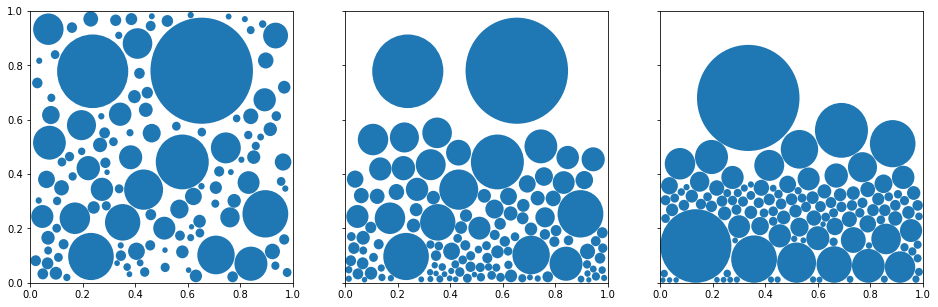

In [644]:
plot_packs(shapes, new_shapes, newnew)